# The Metric

The submetric this notebook is exploring is safety. The metric will be measured by crime count across neighborhoods in Pittsburgh.
Safety is important to our group's primary metric (money-making potential) because, as stated in Maslow's Hierarchy of Needs, physical and psychological safety is a basic human need, and without it, people will not be motivated to generate profits. Secondly, if a neighbourhood is unsafe, the value of the property in the area will tank, making it a bad investment, and thus hinder one's goal of making money.

In [8]:
%%capture
%pip install pandas
import pandas as pd

In [9]:
data = pd.read_csv("Police.csv")
crime_count = data["INCIDENTNEIGHBORHOOD"].value_counts()

# The violent crimes array was generated with the help of ChatGPT-3.5 after providing it with the ouput of data["INCIDENTHIERARCHYDESC"].unique()
violent_crimes = ['AGG-ASSAULT', 'AGG. INDECENT ASSAULT W/ UNCONSCIOUS PERSON', 'CRIMINAL HOMICIDE', 'INDECENT ASSAULT',
                  'RAPE', 'RECKLESSLY ENDANGER ANOTH PER', 'ROBBERY', 'ROBBERY OF MOTOR VEHICLE', 'SEXUAL ASSAULT', 'SIMPLE ASSAULT']
violent_data = data[data["INCIDENTHIERARCHYDESC"].isin(violent_crimes)]
violent_crime_count = violent_data["INCIDENTNEIGHBORHOOD"].value_counts()

# The money crimes array was generated with the help of ChatGPT-3.5 after providing it with the ouput of data["INCIDENTHIERARCHYDESC"].unique()
money_crimes = ['BAD CHECKS', 'BURGLARY', 'CREDIT CARDS', 'FORGERY', 'FOUND PROPERTY', 'GAMBLING INVESTIGATION', 'LOST PROPERTY', 'RECEIVING STOLEN PROPERTY',
                'RETSIL THEFT (SHOPLIFTING)', 'STOLEN PROPERTY - OTHER', 'THEFT', 'THEFT BY DECEPTION', 'THEFT BY EXTORTION', 'THEFT FROM AUTO', 'THEFT OF SERVICES']
money_data = data[data["INCIDENTHIERARCHYDESC"].isin(money_crimes)]
money_crime_count = money_data["INCIDENTNEIGHBORHOOD"].value_counts()

<Axes: title={'center': 'Crime Count By Neighbourhood'}, xlabel='Neighbourhood', ylabel='Crime Count'>

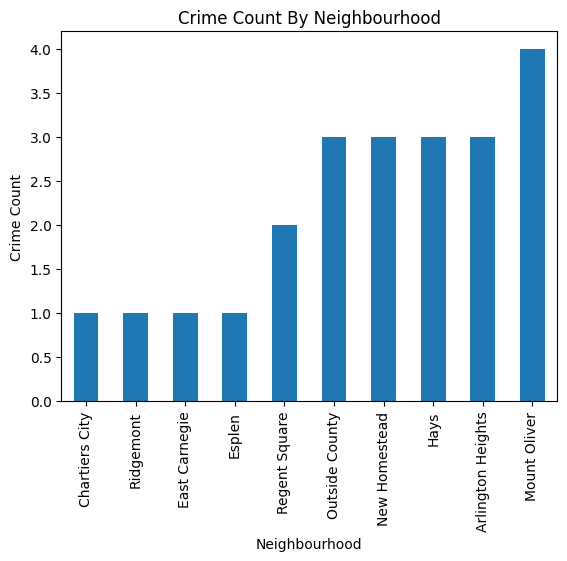

In [10]:
crime_count.nsmallest(10).plot.bar(title="Crime Count By Neighbourhood", xlabel="Neighbourhood", ylabel="Crime Count")

<Axes: title={'center': 'Violent Crime Count By Neighbourhood'}, xlabel='Neighbourhood', ylabel='Crime Count'>

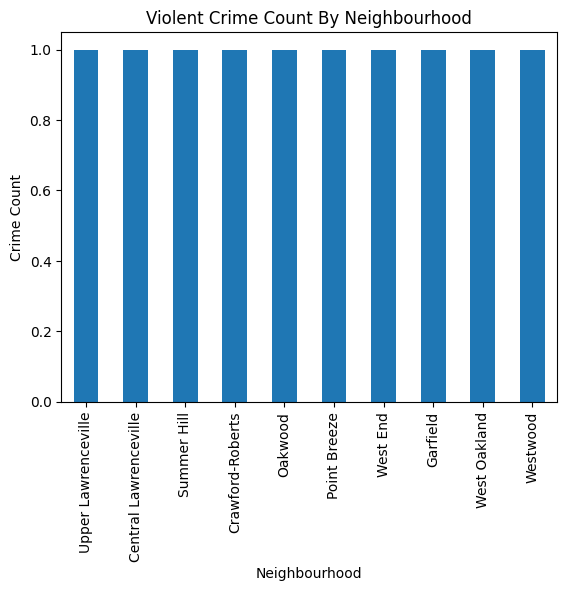

In [11]:
violent_crime_count.nsmallest(10).plot.bar(title="Violent Crime Count By Neighbourhood", xlabel="Neighbourhood", ylabel="Crime Count")

<Axes: title={'center': 'Money Crime Count By Neighbourhood'}, xlabel='Neighbourhood', ylabel='Crime Count'>

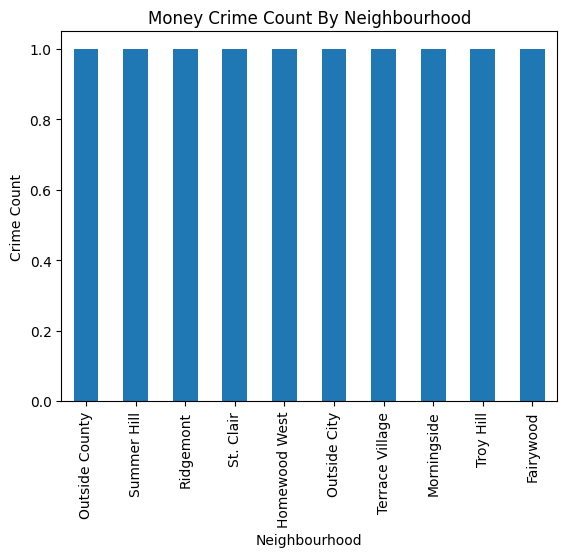

In [12]:
money_crime_count.nsmallest(10).plot.bar(title="Money Crime Count By Neighbourhood", xlabel="Neighbourhood", ylabel="Crime Count")

In [13]:
weighted_crimes = crime_count.to_dict()
number_of_crimes = crime_count.to_dict()
for k, v in violent_crime_count.items():
    weighted_crimes[k] = v
    number_of_crimes[k] = v
for k, v in money_crime_count.items():
    weighted_crimes[k] += v * 2
    number_of_crimes[k] += v
for k, v in crime_count.items():
    weighted_crimes[k] += (v - number_of_crimes[k]) * 0.5

weighted_crime_count = pd.Series(weighted_crimes)

<Axes: title={'center': 'Weighted Crime Count By Neighbourhood'}, xlabel='Neighbourhood', ylabel='Crime Count'>

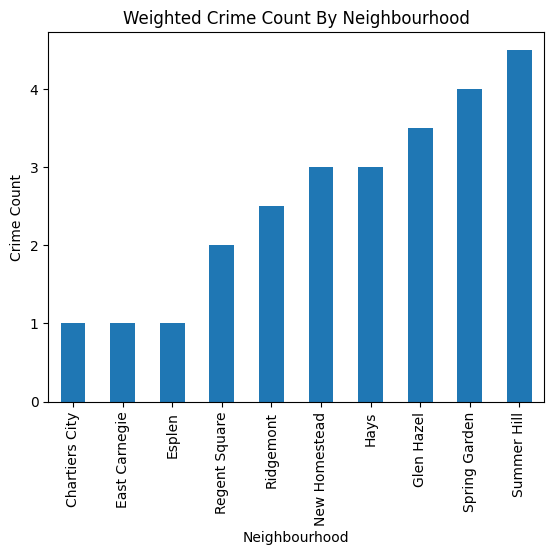

In [14]:
weighted_crime_count.nsmallest(10).plot.bar(title="Weighted Crime Count By Neighbourhood", xlabel="Neighbourhood", ylabel="Crime Count")

# Conclusion

In conclusion, do not live in Central Business District, it takes the crown for worst neighbourhood by crime count across all categories, including weighted. The best neighbourhoods are Chartiers City, East Carnegie and Esplen.